In [4]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def embedding_metrics_matrix(path):
    with open(path, 'r') as file:
        data = json.load(file)
    # Extracting the keys that contain the temporal comparisons
    #keys = [key for key in data.keys() if '_' in key]
    keys=['T1_T1', 'T1_T2', 'T1_T3', 'T1_T4', 'T2_T2', 'T2_T3', 'T2_T4', 'T3_T3', 'T3_T4', 'T4_T4']
    # Create an empty matrix for the distances
    matrix_size = 4
    # Assuming it's a square matrix
    cosine_similarity_matrix =np.full((matrix_size, matrix_size), np.nan)
    cosine_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    manhattan_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    euclidean_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    wasserstein_distance_matrix=np.full((matrix_size, matrix_size), np.nan)
    # Filling the matrices with the corresponding values
    for key in keys:
        i=int(key[1:].split('_T')[1])
        j=int(key[1:].split('_T')[0])
        cosine_distance_matrix[i-1, j-1] = data[key]['metrics']['cosine_distance']
        manhattan_distance_matrix[i-1, j-1] = data[key]['metrics']['manhattan_distance']
        euclidean_distance_matrix[i-1, j-1] = data[key]['metrics']['euclidean_distance']
        cosine_similarity_matrix[i-1, j-1] = data[key]['metrics']['cosine_similarity']
        wasserstein_distance_matrix[i-1, j-1] = data[key]['metrics']['wasserstain']

        cosine_distance_matrix[j-1, i-1] = data[key]['metrics']['cosine_distance']
        manhattan_distance_matrix[j-1, i-1] = data[key]['metrics']['manhattan_distance']
        euclidean_distance_matrix[j-1, i-1]= data[key]['metrics']['euclidean_distance']
        cosine_similarity_matrix[j-1, i-1] = data[key]['metrics']['cosine_similarity']
        wasserstein_distance_matrix[j-1, i-1] = data[key]['metrics']['wasserstain']

    return cosine_distance_matrix,cosine_similarity_matrix,euclidean_distance_matrix,manhattan_distance_matrix,wasserstein_distance_matrix

def token_metrics_matrix(path):
    with open(path, 'r') as file:
        data = json.load(file)
    keys=['T1_T1', 'T1_T2', 'T1_T3', 'T1_T4', 'T2_T2', 'T2_T3', 'T2_T4', 'T3_T3', 'T3_T4', 'T4_T4']
    # Create an empty matrix for the distances
    matrix_size = 4
    matrix = np.full((matrix_size, matrix_size), np.nan)
    for key in keys:
        i=int(key[1:].split('_T')[1])
        j=int(key[1:].split('_T')[0])
        matrix[i-1, j-1] = data[key]
        matrix[j-1, i-1] = data[key]
    return matrix


df_name='mimic'
folder_path='/home/weisi/TemporalAssessment/analysis/'


jaccard_path=os.path.join(folder_path,'token_metrics',f'{df_name}_jaccard_results.json')
tfidf_path=os.path.join(folder_path,'token_metrics',f'{df_name}_cosine_tfidf_of_most_freq_tokens.json')
sbert_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_miniLM_t-test-results.json')
'''simcse_sup_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_simcse_sup_t-test-results.json')
simcse_unsup_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_simcse_unsup_t-test-results.json')'''
use_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_use_t-test-results.json')
biolord_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_biolord_t-test-results.json')
medcpt_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_medcpt_t-test-results.json')

jaccard_matrix=token_metrics_matrix(jaccard_path)
tfidf_matrix=token_metrics_matrix(tfidf_path)
sbert_cosine_dist_matrix,sbert_cosine_sim_matrix,sbert_euclidean_dist_matrix,sbert_manhattan_dist_matrix,sbert_wasserstein_dist_matrix=embedding_metrics_matrix(sbert_path)
biolord_cosine_dist_matrix,biolord_cosine_sim_matrix,biolord_euclidean_dist_matrix,biolord_manhattan_dist_matrix,biolord_wasserstein_dist_matrix=embedding_metrics_matrix(biolord_path)
medcpt_cosine_dist_matrix,medcpt_cosine_sim_matrix,medcpt_euclidean_dist_matrix,medcpt_manhattan_dist_matrix,medcpt_wasserstein_dist_matrix=embedding_metrics_matrix(medcpt_path)
use_cosine_dist_matrix,use_cosine_sim_matrix,use_euclidean_dist_matrix,use_manhattan_dist_matrix,use_wasserstein_dist_matrix=embedding_metrics_matrix(use_path)

In [5]:
# performance matrixes of mimic:
import os
import json
import numpy as np
import pandas as pd


base_path = "/HDD16TB/weisi/logs"
Task = 'Mimic'

options = ['T1-T1', 'T1-T2', 'T1-T3', 'T1-T4', 'T2-T1','T2-T2', 'T2-T3', 'T2-T4',  'T3-T1', 'T3-T2','T3-T3', 'T3-T4','T4-T1','T4-T2','T4-T3', 'T4-T4']
model_name = 'bert-base-uncased'
seeds = range(1, 6)
metrics = ["predict_micro_f1", "predict_micro_precision", "predict_micro_recall"]

performance_matrices = {metric: np.zeros((4, 4)) for metric in metrics}

for metric in metrics:
    for i in range(1, 5):  # D1 to D4
        for j in range(1, 5):  # D1 to D4
            values = []
            for seed in seeds:
                option = f'T{i}-T{j}'
                file_path = os.path.join(base_path, Task, model_name, option.replace('-', '_'), f"split_seed{seed}", "model_seed_42_3e-5_20epc", "predict_results.json")
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    values.append(data[metric])
            # save 5 seeds mean
            performance_matrices[metric][j-1, i-1] = np.mean(values)
performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}
'''print(performance_matrices["predict_micro_f1"])
print(performance_matrices["predict_micro_precision"])
print(performance_matrices["predict_micro_precision"])'''

performance_change_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = matrix[i, j] - matrix[i, i]  
    performance_change_matrices[metric] = change_matrix

performance_change_vecs = {metric: matrix.flatten() for metric, matrix in performance_change_matrices.items()}

performance_change_percentage_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = (matrix[i, j] - matrix[i, i] )/matrix[i, i] 
    performance_change_percentage_matrices[metric] = change_matrix

'''print(performance_change_percentage_matrices["predict_micro_f1"])
print(performance_change_percentage_matrices["predict_micro_precision"])
print(performance_change_percentage_matrices["predict_micro_precision"])'''

performance_change_percentage_vecs = {metric: matrix.flatten() for metric, matrix in performance_change_percentage_matrices.items()}


In [6]:
import numpy as np

metrics = ["predict_samples_f1", "predict_samples_precision", "predict_samples_recall"]

# 初始化 performance_matrices
performance_matrices = {
    "predict_samples_f1": np.zeros((4, 4)),
    "predict_samples_precision": np.zeros((4, 4)),
    "predict_samples_recall": np.zeros((4, 4)),
}

# 表格结果
results = {
    "predict_samples_f1": [
        [0.55051, 0.52351, 0.47944, 0.45297],
        [0.54507, 0.54168, 0.49708, 0.46690],
        [0.51233, 0.51767, 0.50953, 0.48611],
        [0.47445, 0.48238, 0.47974, 0.49600]
    ],
    "predict_samples_precision": [
        [0.67380, 0.65332, 0.62503, 0.57290],
        [0.65031, 0.65914, 0.63248, 0.57897],
        [0.61659, 0.63292, 0.64752, 0.60326],
        [0.59941, 0.61760, 0.63417, 0.62953]
    ],
    "predict_samples_recall": [
        [0.50871, 0.47768, 0.42627, 0.41441],
        [0.51673, 0.50314, 0.44959, 0.43326],
        [0.48656, 0.48429, 0.46088, 0.45008],
        [0.43709, 0.43834, 0.42496, 0.45112]
    ],
    "predict_macro_f1": [
        [0.41350, 0.40973, 0.38973, 0.35313],
        [0.42826, 0.44189, 0.41581, 0.38068],
        [0.39540, 0.41130, 0.41333, 0.38563],
        [0.35695, 0.37407, 0.37389, 0.38527]
    ],
    "predict_micro_f1": [
        [0.58659, 0.56677, 0.53039, 0.50265],
        [0.57907, 0.58264, 0.54229, 0.51549],
        [0.54587, 0.55765, 0.55499, 0.53334],
        [0.50630, 0.52316, 0.52285, 0.54188]
    ],
    "predict_weighted_f1": [
        [0.53547, 0.51195, 0.47409, 0.45005],
        [0.53939, 0.53977, 0.49655, 0.47440],
        [0.50166, 0.51182, 0.50858, 0.49011],
        [0.45581, 0.47252, 0.47637, 0.49976]
    ]
}

# 给 performance_matrices 赋值（需要转置）
for metric in metrics:
    performance_matrices[metric] = np.array(results[metric]).T

# 打印 performance_matrices 验证
'''for metric, matrix in performance_matrices.items():
    print(f"{metric}:\n{matrix}\n")'''

performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}

performance_change_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = matrix[i, j] - matrix[i, i]  
    performance_change_matrices[metric] = change_matrix

performance_change_vecs = {metric: matrix.flatten() for metric, matrix in performance_change_matrices.items()}

# performance_change_percentage_ is not the performance change value in percentage,
performance_change_percentage_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = (matrix[i, j] - matrix[i, i] )/matrix[i, i] 
    performance_change_percentage_matrices[metric] = change_matrix

print(performance_change_percentage_matrices["predict_samples_f1"])

performance_change_percentage_vecs = {metric: matrix.flatten() for metric, matrix in performance_change_percentage_matrices.items()}


[[ 0.         -0.00988175 -0.06935387 -0.13816279]
 [-0.03354379  0.         -0.04432506 -0.10947423]
 [-0.05905442 -0.02443428  0.         -0.05846564]
 [-0.08675403 -0.05866935 -0.01993952  0.        ]]


In [7]:
# 假设矩阵已经定义
# matrices_list 包含所有需要计算极值比率的矩阵
'''matrices_list = [
    jaccard_matrix,

    tfidf_matrix,

    use_cosine_dist_matrix,
    use_euclidean_dist_matrix,
    use_manhattan_dist_matrix,

    sbert_cosine_dist_matrix,
    sbert_euclidean_dist_matrix,
    sbert_manhattan_dist_matrix,

    
    biolord_cosine_dist_matrix,
    biolord_euclidean_dist_matrix,
    biolord_manhattan_dist_matrix,

    medcpt_cosine_dist_matrix,
    medcpt_euclidean_dist_matrix,
    medcpt_manhattan_dist_matrix,
]

# 矩阵名称，用于输出结果
matrices_names = [
    "Jaccard Similarity",    
    "TF-IDF Cosine Similarity",

    "USE Cosine Distance",
    "USE Euclidean Distance",
    "USE Manhattan Distance",

    "S-BERT Cosine Distance",    
    "S-BERT Euclidean Distance",
    "S-BERT Manhattan Distance",
    
    "BioLORD Cosine Distance",
    "BioLORD Euclidean Distance",
    "BioLORD Manhattan Distance",

    "MedCPT Cosine Distance",
    "MedCPT Euclidean Distance",
    "MedCPT Manhattan Distance",    
]'''

matrices_list=[
    use_cosine_sim_matrix,
    use_wasserstein_dist_matrix,
    sbert_cosine_sim_matrix,
    sbert_wasserstein_dist_matrix,
    biolord_cosine_sim_matrix,
    biolord_wasserstein_dist_matrix,
    medcpt_cosine_sim_matrix,
    medcpt_wasserstein_dist_matrix,
]
matrices_names = [

    "USE Cosine Similarity",
    "USE Wasserstein Distance",
    "SBERT Cosine Similarity",
    "SBERT Wasserstein Distance",
    "BioLORD Cosine Similarity",
    "BioLORD Wasserstein Distance",
    "MedCPT Cosine Similarity",
    "MedCPT Wasserstein Distance",
]
for name, matrix in zip(matrices_names, matrices_list):
    variability = (np.max(matrix)-np.min(matrix))/ np.max(matrix)
    extremes_ratio = np.max(matrix) / np.min(matrix)
    print(f'{name} Extremes Ratio: \t \t {extremes_ratio:.2f}')
    #print(f'{variability:.3f}')

USE Cosine Similarity Extremes Ratio: 	 	 1.01
USE Wasserstein Distance Extremes Ratio: 	 	 11.91
SBERT Cosine Similarity Extremes Ratio: 	 	 1.00
SBERT Wasserstein Distance Extremes Ratio: 	 	 11.15
BioLORD Cosine Similarity Extremes Ratio: 	 	 1.01
BioLORD Wasserstein Distance Extremes Ratio: 	 	 8.59
MedCPT Cosine Similarity Extremes Ratio: 	 	 1.00
MedCPT Wasserstein Distance Extremes Ratio: 	 	 13.17


In [10]:
# performance_matrices = {'f1': predict_micro_f1_matrix, 'precision': predict_micro_precision_matrix, 'recall': predict_micro_recall_matrix}
from scipy.stats import pearsonr
# matrix 2 vector

jaccard_vec = jaccard_matrix.flatten()
tfidf_vec = tfidf_matrix.flatten()

sbert_cos = sbert_cosine_dist_matrix.flatten()
sbert_euc = sbert_euclidean_dist_matrix.flatten()
sbert_man = sbert_manhattan_dist_matrix.flatten()

biolord_cos = biolord_cosine_dist_matrix.flatten()
biolord_euc = biolord_euclidean_dist_matrix.flatten()
biolord__man = biolord_manhattan_dist_matrix.flatten()

medcpt_cos = medcpt_cosine_dist_matrix.flatten()
medcpt_euc= medcpt_euclidean_dist_matrix.flatten()
medcpt_man = medcpt_manhattan_dist_matrix.flatten()
        
use_cos = use_cosine_dist_matrix.flatten()
use_euc = use_euclidean_dist_matrix.flatten()
use_man = use_manhattan_dist_matrix.flatten()
        
# performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}

dist_vecs = {
    'jaccard_vec':jaccard_vec,
    'tfidf_vec':tfidf_vec,
    'use_cos': use_cos,
    'use_euc': use_euc,
    'use_man': use_man,
    'sbert_cos': sbert_cos,
    'sbert_euc': sbert_euc,
    'sbert_man': sbert_man,
    'biolord_cos': biolord_cos,
    'biolord_euc': biolord_euc,
    'biolord__man': biolord__man,
    'medcpt_cos': medcpt_cos,
    'medcpt_euc': medcpt_euc,
    'medcpt_man': medcpt_man,
    # Add other vectors here
}


# Calculate correlation matrix with p-values ["predict_samples_f1"]
correlation_matrix = {}
p_value_matrix = {}
for metric, perf_vec in performance_change_percentage_vecs.items():
    correlations = {}
    p_values = {}
    for comp_metric, comp_perf_vec in dist_vecs.items():
        r_value, p_value = pearsonr(perf_vec, comp_perf_vec)
        correlations[comp_metric] = r_value
        p_values[comp_metric] = p_value
    correlation_matrix[metric] = correlations
    p_value_matrix[metric] = p_values

# Print correlation matrix with p-values
for metric, correlations in correlation_matrix.items():
    print(f"{metric} performance correlations :")
    for comp_metric, r_value in correlations.items():
        p_value = p_value_matrix[metric][comp_metric]
        print(f"{comp_metric}: r = {r_value:.2f}, p = {p_value:.4f}")
    print("\n")


predict_samples_f1 performance correlations :
jaccard_vec: r = 0.69, p = 0.0030
tfidf_vec: r = 0.74, p = 0.0010
use_cos: r = -0.71, p = 0.0022
use_euc: r = -0.74, p = 0.0010
use_man: r = -0.74, p = 0.0009
sbert_cos: r = -0.87, p = 0.0000
sbert_euc: r = -0.88, p = 0.0000
sbert_man: r = -0.88, p = 0.0000
biolord_cos: r = -0.82, p = 0.0001
biolord_euc: r = -0.84, p = 0.0000
biolord__man: r = -0.84, p = 0.0000
medcpt_cos: r = -0.87, p = 0.0000
medcpt_euc: r = -0.89, p = 0.0000
medcpt_man: r = -0.89, p = 0.0000


predict_samples_precision performance correlations :
jaccard_vec: r = 0.71, p = 0.0021
tfidf_vec: r = 0.79, p = 0.0003
use_cos: r = -0.75, p = 0.0008
use_euc: r = -0.79, p = 0.0003
use_man: r = -0.79, p = 0.0003
sbert_cos: r = -0.90, p = 0.0000
sbert_euc: r = -0.91, p = 0.0000
sbert_man: r = -0.91, p = 0.0000
biolord_cos: r = -0.86, p = 0.0000
biolord_euc: r = -0.87, p = 0.0000
biolord__man: r = -0.87, p = 0.0000
medcpt_cos: r = -0.90, p = 0.0000
medcpt_euc: r = -0.91, p = 0.0000
m

In [9]:
# performance_matrices = {'f1': predict_micro_f1_matrix, 'precision': predict_micro_precision_matrix, 'recall': predict_micro_recall_matrix}
from scipy.stats import pearsonr
# matrix 2 vector

jaccard_vec = jaccard_matrix.flatten()
tfidf_vec = tfidf_matrix.flatten()

sbert_cos = sbert_cosine_dist_matrix.flatten()
sbert_euc = sbert_euclidean_dist_matrix.flatten()
sbert_man = sbert_manhattan_dist_matrix.flatten()

biolord_cos = biolord_cosine_dist_matrix.flatten()
biolord_euc = biolord_euclidean_dist_matrix.flatten()
biolord__man = biolord_manhattan_dist_matrix.flatten()

medcpt_cos = medcpt_cosine_dist_matrix.flatten()
medcpt_euc= medcpt_euclidean_dist_matrix.flatten()
medcpt_man = medcpt_manhattan_dist_matrix.flatten()
        
use_cos = use_cosine_dist_matrix.flatten()
use_euc = use_euclidean_dist_matrix.flatten()
use_man = use_manhattan_dist_matrix.flatten()
        

use_wass=use_wasserstein_dist_matrix.flatten()
sbert_wass=sbert_wasserstein_dist_matrix.flatten()
biolord_wass=biolord_wasserstein_dist_matrix.flatten()
medcpt_wass=medcpt_wasserstein_dist_matrix.flatten()
# performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}

dist_vecs = {
    'use_wasserstein':use_wass,
    'sbert_wasserstein':sbert_wass,
    'biolord_wasserstein':biolord_wass,
    'medcpt_wasserstein':medcpt_wass,
    # Add other vectors here
}
'''jaccard_vec':jaccard_vec,
    'tfidf_vec':tfidf_vec,
    'use_cos': use_cos,
    'use_euc': use_euc,
    'use_man': use_man,
    'sbert_cos': sbert_cos,
    'sbert_euc': sbert_euc,
    'sbert_man': sbert_man,
    'biolord_cos': biolord_cos,
    'biolord_euc': biolord_euc,
    'biolord__man': biolord__man,
    'medcpt_cos': medcpt_cos,
    'medcpt_euc': medcpt_euc,
    'medcpt_man': medcpt_man,'''

# Calculate correlation matrix with p-values ["predict_samples_f1"]
correlation_matrix = {}
p_value_matrix = {}
for metric, perf_vec in performance_change_vecs.items():
    correlations = {}
    p_values = {}
    for comp_metric, comp_perf_vec in dist_vecs.items():
        r_value, p_value = pearsonr(perf_vec, comp_perf_vec)
        correlations[comp_metric] = r_value
        p_values[comp_metric] = p_value
    correlation_matrix[metric] = correlations
    p_value_matrix[metric] = p_values

# Print correlation matrix with p-values
for metric, correlations in correlation_matrix.items():
    print(f"{metric} performance change correlations :")
    for comp_metric, r_value in correlations.items():
        p_value = p_value_matrix[metric][comp_metric]
        print(f"{comp_metric}: r = {r_value:.2f}, p = {p_value:.4f}")
    print("\n")


predict_samples_f1 performance change correlations :
use_wasserstein: r = -0.74, p = 0.0010
sbert_wasserstein: r = -0.81, p = 0.0001
biolord_wasserstein: r = -0.86, p = 0.0000
medcpt_wasserstein: r = -0.86, p = 0.0000


predict_samples_precision performance change correlations :
use_wasserstein: r = -0.79, p = 0.0003
sbert_wasserstein: r = -0.85, p = 0.0000
biolord_wasserstein: r = -0.89, p = 0.0000
medcpt_wasserstein: r = -0.90, p = 0.0000


predict_samples_recall performance change correlations :
use_wasserstein: r = -0.63, p = 0.0094
sbert_wasserstein: r = -0.69, p = 0.0029
biolord_wasserstein: r = -0.76, p = 0.0007
medcpt_wasserstein: r = -0.75, p = 0.0009




In [10]:
# compute pearson correlation_matrix
correlation_matrix = {}

for metric, perf_vec in performance_change_vecs.items():
    correlations = {
        'jaccard': np.corrcoef(perf_vec, jaccard_vec)[0, 1],
        'tfidf': np.corrcoef(perf_vec, tfidf_vec)[0, 1],
        'cosine_dist': np.corrcoef(perf_vec, cosine_dist_vec)[0, 1],
        'euclidean_dist': np.corrcoef(perf_vec, euclidean_dist_vec)[0, 1],
        'manhattan_dist': np.corrcoef(perf_vec, manhattan_dist_vec)[0, 1]
    }
    correlation_matrix[metric] = correlations

# 
for metric, correlations in correlation_matrix.items():
    print(f"{metric} Performance Change Correlations with:")
    for key, value in correlations.items():
        print(f"{key}: {value}")
    print("\n")

predict_micro_f1 Performance Change Correlations with:
jaccard: 0.5699112949098968
tfidf: 0.6130765937492096
cosine_dist: -0.8225677048300047
euclidean_dist: -0.7941128832296734
manhattan_dist: -0.7918829970447142


predict_micro_precision Performance Change Correlations with:
jaccard: 0.45077519671477834
tfidf: 0.47609436786379306
cosine_dist: -0.6374156032749057
euclidean_dist: -0.6194932345586518
manhattan_dist: -0.6180747713281314


predict_micro_recall Performance Change Correlations with:
jaccard: 0.5885439386762874
tfidf: 0.623887119222293
cosine_dist: -0.8501394344281188
euclidean_dist: -0.8198754396483626
manhattan_dist: -0.8170949853622645




In [11]:
# compute pearson correlation_matrix
correlation_matrix = {}

for metric, perf_vec in performance_change_percentage_vecs.items():
    correlations = {
        'jaccard': np.corrcoef(perf_vec, jaccard_vec)[0, 1],
        'tfidf': np.corrcoef(perf_vec, tfidf_vec)[0, 1],
        'cosine_dist': np.corrcoef(perf_vec, cosine_dist_vec)[0, 1],
        'euclidean_dist': np.corrcoef(perf_vec, euclidean_dist_vec)[0, 1],
        'manhattan_dist': np.corrcoef(perf_vec, manhattan_dist_vec)[0, 1]
    }
    correlation_matrix[metric] = correlations

# 
for metric, correlations in correlation_matrix.items():
    print(f" {metric} Performance change percentage correlations with:")
    for key, value in correlations.items():
        print(f"{key}: {value}")
    print("\n")

 predict_micro_f1 Performance change percentage correlations with:
jaccard: 0.579869511679484
tfidf: 0.6046265496589817
cosine_dist: -0.8035144100544032
euclidean_dist: -0.7849238522983637
manhattan_dist: -0.7825910880741357


 predict_micro_precision Performance change percentage correlations with:
jaccard: 0.4605366171162297
tfidf: 0.47705048819174134
cosine_dist: -0.6408196996302519
euclidean_dist: -0.6252371861016929
manhattan_dist: -0.6235241429091175


 predict_micro_recall Performance change percentage correlations with:
jaccard: 0.6096004561388766
tfidf: 0.6321821774706229
cosine_dist: -0.8372904045359945
euclidean_dist: -0.8200388740404198
manhattan_dist: -0.8174838177381012




                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                        6
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 10 Mar 2024                                         
Time:                        01:36:05                                         
No. Iterations:                     3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        368.5719    189.076      1.949      0.0

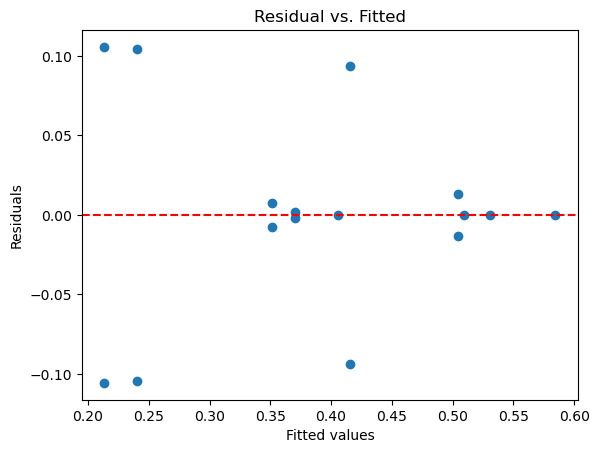

In [75]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid



jaccard_vec = jaccard_matrix.flatten()
tfidf_vec = tfidf_matrix.flatten()

sbert_cos = sbert_cosine_dist_matrix.flatten()
sbert_euc = sbert_euclidean_dist_matrix.flatten()
sbert_man = sbert_manhattan_dist_matrix.flatten()

simcse_sup_cos = simcse_sup_cosine_dist_matrix.flatten()
simcse_sup_euc = simcse_sup_euclidean_dist_matrix.flatten()
simcse_sup_man = simcse_sup_manhattan_dist_matrix.flatten()

simcse_unsup_cos = simcse_unsup_cosine_dist_matrix.flatten()
simcse_unsup_euc= simcse_unsup_euclidean_dist_matrix.flatten()
simcse_unsup_man = simcse_unsup_manhattan_dist_matrix.flatten()
        
use_cos = use_cosine_dist_matrix.flatten()
use_euc = use_euclidean_dist_matrix.flatten()
use_man = use_manhattan_dist_matrix.flatten()

perf_metric = 'predict_micro_f1'   #'predict_micro_recall'  # 'predict_micro_f1'  
y0= performance_matrices[perf_metric].flatten()
y1=performance_change_vecs[perf_metric]
y2=performance_change_percentage_vecs[perf_metric]
'''
predict_micro_f1: 
y0 and X0(all metrics) pvalue works well
y0 and Xcos Xeuc Xman fail (pvalue> 0.9)
y1 and y2 fail with X0 (pvalue> 0.9)
precision and recall fail on some metrics

'''

X0 = np.column_stack([jaccard_vec, tfidf_vec, sbert_cos, sbert_euc, sbert_man,simcse_sup_cos,simcse_sup_euc,simcse_sup_man,simcse_unsup_cos,simcse_unsup_euc,simcse_unsup_man,use_cos,use_euc,use_man])
X0 = sm.add_constant(X0)  


Xcos = np.column_stack([jaccard_vec, tfidf_vec, sbert_cos,simcse_sup_cos,simcse_unsup_cos,use_cos])
Xcos = sm.add_constant(Xcos) 

Xeuc = np.column_stack([jaccard_vec, tfidf_vec, sbert_euc,simcse_sup_euc,simcse_unsup_euc,use_euc])
Xeuc = sm.add_constant(Xeuc) 

Xman = np.column_stack([jaccard_vec, tfidf_vec, sbert_man ,simcse_sup_man ,simcse_unsup_man ,use_man ])
Xman = sm.add_constant(Xman) 

'''model = sm.OLS(y2, X)
results = model.fit()
print(results.summary())'''

model_rlm = sm.RLM(y0, X0 , M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())

fig, ax = plt.subplots()
ax.scatter(results_rlm.fittedvalues, results_rlm.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual vs. Fitted')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [35]:
print(performance_change_matrices)

{'predict_micro_f1': array([[ 0.        , -0.01311803, -0.17192003, -0.42290621],
       [-0.0180162 ,  0.        , -0.13667803, -0.37345336],
       [-0.06198608, -0.03687517,  0.        , -0.08310224],
       [-0.26516963, -0.23979963, -0.07483756,  0.        ]]), 'predict_micro_precision': array([[ 0.        , -0.01819362, -0.19036864, -0.55417329],
       [-0.01912342,  0.        , -0.1606845 , -0.5206833 ],
       [-0.0497749 , -0.03054881,  0.        , -0.17227114],
       [-0.1244872 , -0.11406922,  0.02597364,  0.        ]]), 'predict_micro_recall': array([[ 0.        , -0.01022763, -0.15109593, -0.34190397],
       [-0.01599437,  0.        , -0.11578624, -0.29071406],
       [-0.05669498, -0.03384276,  0.        , -0.04718963],
       [-0.2988132 , -0.27434421, -0.12020955,  0.        ]])}


In [17]:
perf_metric = 'predict_micro_f1'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     14.17
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           0.000301
Time:                        14:25:23   Log-Likelihood:                 21.557
No. Observations:                  16   AIC:                            -35.11
Df Residuals:                      12   BIC:                            -32.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4654      1.923      2.322      0.0

/home/weisi/anaconda3/envs/tempo0/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
import statsmodels.api as sm


perf_metric = 'predict_micro_f1'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())

NameError: name 'performance_change_vecs' is not defined

In [19]:
import statsmodels.api as sm


perf_metric = 'predict_micro_f1'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        14:27:03                                         
No. Iterations:                    28                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9720      1.877      2.116      0.0